In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
import models as tests

In [2]:
# Reading in data sets
red_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [3]:
red_df = pd.read_csv(red_url, sep=';')
white_df = pd.read_csv(white_url, sep=';')

In [4]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#Making a column for red and white
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

In [7]:
#Combining both data sets
wine_combined = pd.concat([red_df, white_df], axis=0)

In [8]:
#Making sure their both in there
wine_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
wine_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [10]:
#Seeing where the highest and lowest quality wine numbers are.
wine_combined['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [11]:
wine_combined['quality'].value_counts(normalize=True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

In [12]:
#Trying out Nicks version of creating bins. Adding in a bad quality
threshold = 6
wine_combined['quality'] = wine_combined['quality'].where(wine_combined['quality'] > threshold, other=0)

#Double checking the quality column to make sure changes went through
wine_combined['quality'].unique()

array([0, 7, 8, 9], dtype=int64)

In [13]:
#Creating good category
threshold = 7
wine_combined['quality'] = wine_combined['quality'].where(wine_combined['quality'] < threshold, other=1) 
wine_combined['quality'].unique()

array([0, 1], dtype=int64)

In [14]:
#Features and target
X = wine_combined.drop(['quality', 'wine_type'], axis=1)
y = wine_combined['quality']

#Splitting for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Training the rfc model
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [16]:
# Calling predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [17]:
#Lets look at the numbers
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
balanced_test = balanced_accuracy_score(y_test, y_test_pred)
print(f'\nRandom Forest \nTrain Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}\nBalanced Test Score: {balanced_test}')


Random Forest 
Train Accuracy: 1.0
Test Accuracy: 0.89
Balanced Test Score: 0.7735368956743003


In [18]:
#looking for the best features
importances = rf.feature_importances_
importances_sorted = sorted(zip(importances, X.columns), reverse=True)
print("Top 10 Important Features:")
for importance, feature in importances_sorted[:11]:
    print(f"{feature}: {importance:.4f}")

Top 10 Important Features:
alcohol: 0.1579
density: 0.1187
volatile acidity: 0.0884
chlorides: 0.0855
total sulfur dioxide: 0.0838
sulphates: 0.0826
pH: 0.0821
residual sugar: 0.0821
free sulfur dioxide: 0.0769
citric acid: 0.0753
fixed acidity: 0.0668


In [19]:
#Did infact drop the last 2 scores. Improvment was low but still positive.

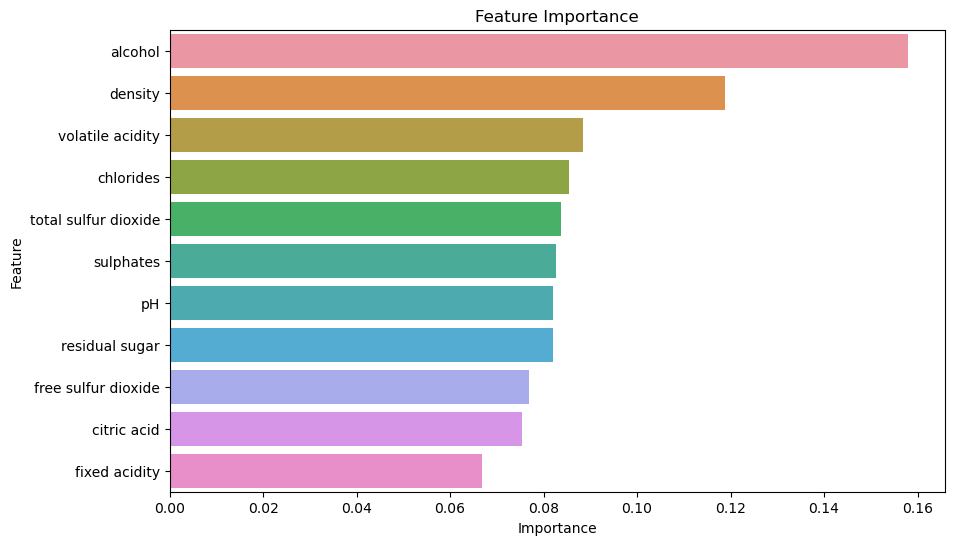

In [20]:
#Added a graph, not sure if we will want/need this for the presentation
feature_importance_df = pd.DataFrame(importances_sorted, columns=['Importance', 'Feature']).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [21]:
#Testing for overfitting because our train score was 1.0
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.87596154 0.87403846 0.88546679 0.88354187 0.88931665]
Mean Cross-Validation Score: 0.881665062560154


In [22]:
X = wine_combined.drop(['quality', 'wine_type','fixed acidity','citric acid','free sulfur dioxide'], axis=1)
y = wine_combined['quality']


In [23]:
#Nick noted that if instead of trying to predict the number 1-10 for quality. Maybe instead create bins for
#poor, ok, and good quality. So that we are doing 1-3 instead of 1-10.

#This ended up working. Created 2 bins for good and bad and had score improvements. Might end up adding an ok section


Random Forest 
Test Accuracy: 0.8907692307692308
balanced test score: 0.7709999394159699
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1048
           1       0.81      0.58      0.67       252

    accuracy                           0.89      1300
   macro avg       0.86      0.77      0.80      1300
weighted avg       0.89      0.89      0.88      1300


Gradient Boost 
Test Accuracy: 0.8407692307692308
balanced test score: 0.6646371016600023

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1048
           1       0.66      0.38      0.48       252

    accuracy                           0.84      1300
   macro avg       0.76      0.66      0.69      1300
weighted avg       0.82      0.84      0.82      1300


Logistic Regression 
Test Accuracy: 0.8246153846153846
balanced test score: 0.6139282685084212
classification re

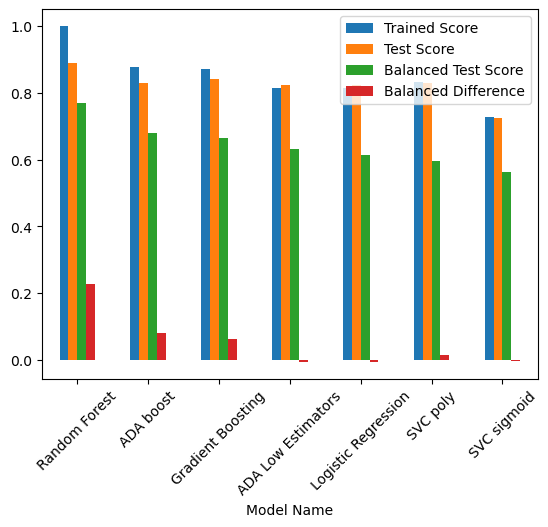

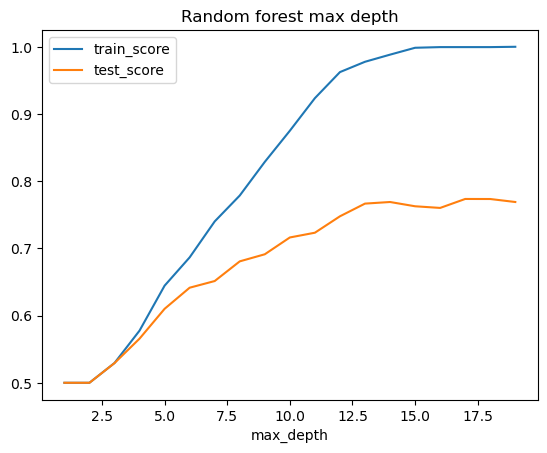

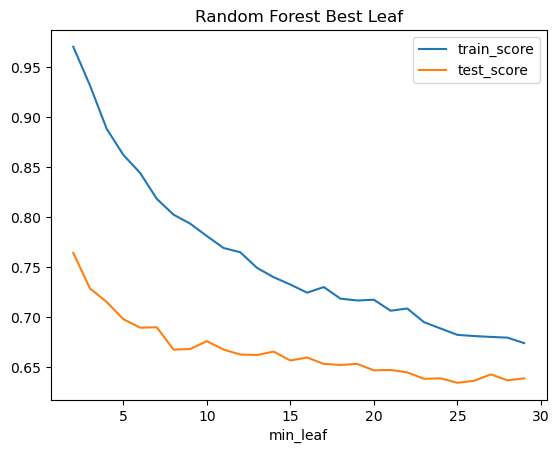

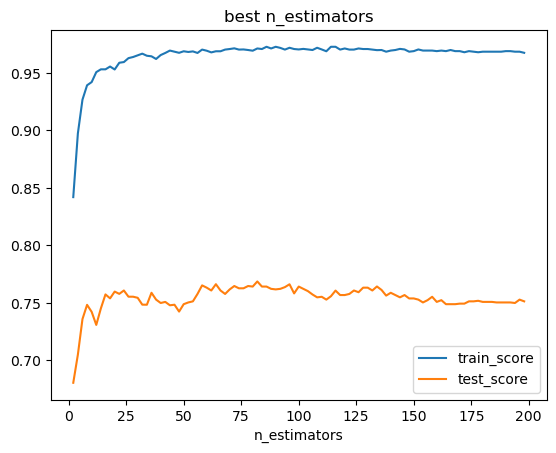

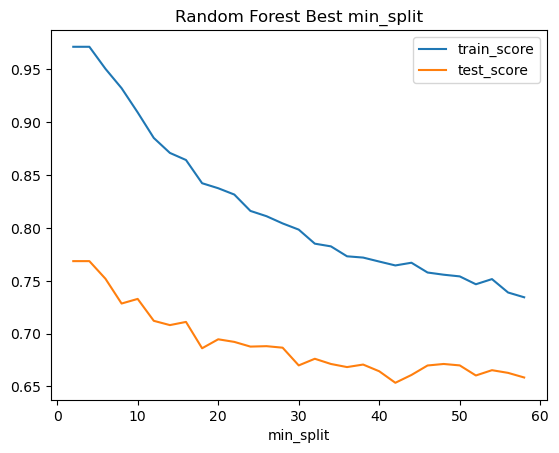

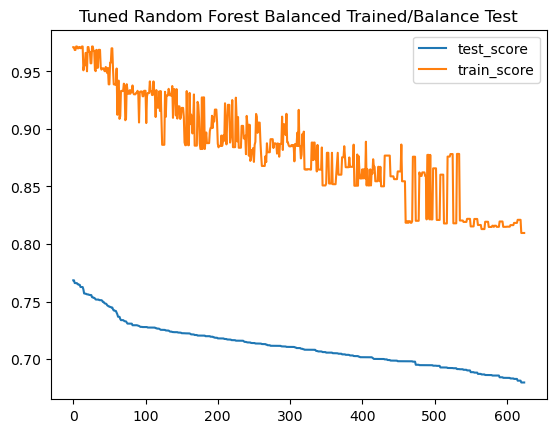

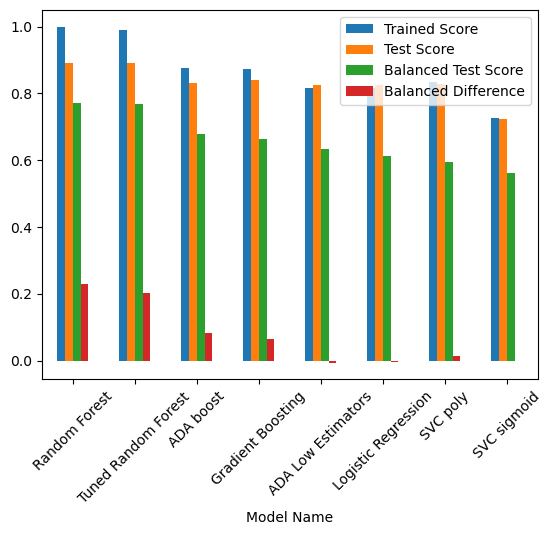

In [24]:
models_min_leaf = tests.many_models_min_leaf(X_train,y_train,X_test,y_test)


Random Forest 
Test Accuracy: 0.8907692307692308
balanced test score: 0.7709999394159699
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1048
           1       0.81      0.58      0.67       252

    accuracy                           0.89      1300
   macro avg       0.86      0.77      0.80      1300
weighted avg       0.89      0.89      0.88      1300


Gradient Boost 
Test Accuracy: 0.8407692307692308
balanced test score: 0.6646371016600023

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1048
           1       0.66      0.38      0.48       252

    accuracy                           0.84      1300
   macro avg       0.76      0.66      0.69      1300
weighted avg       0.82      0.84      0.82      1300


Logistic Regression 
Test Accuracy: 0.8246153846153846
balanced test score: 0.6139282685084212
classification re

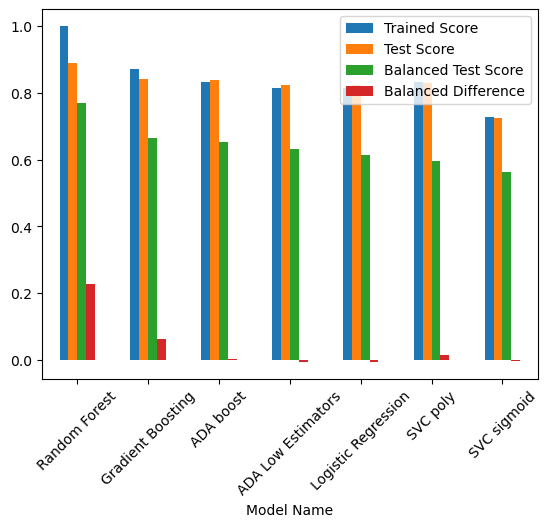

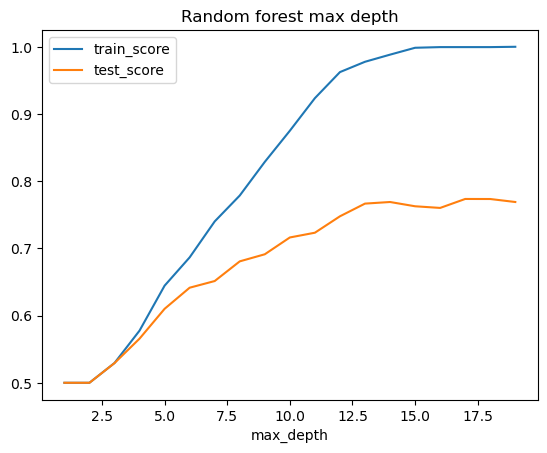

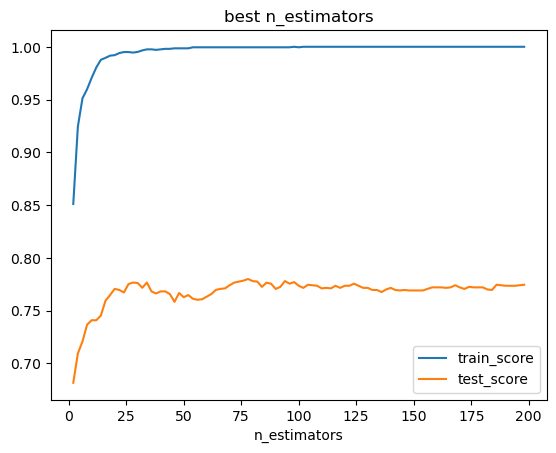

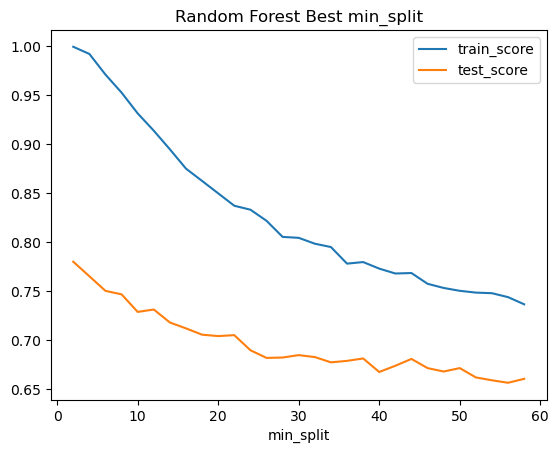

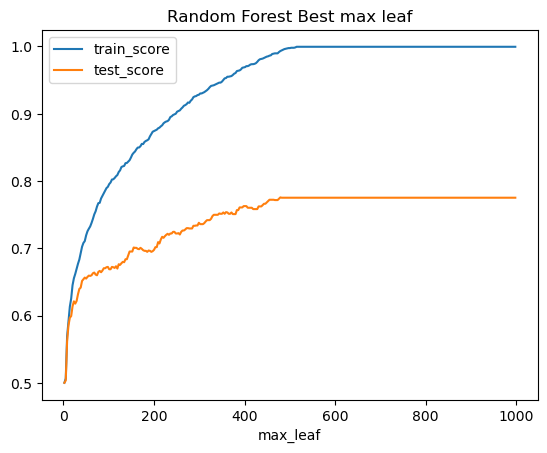

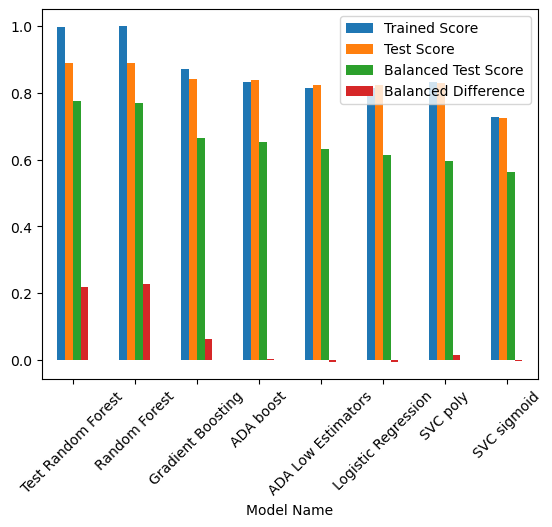

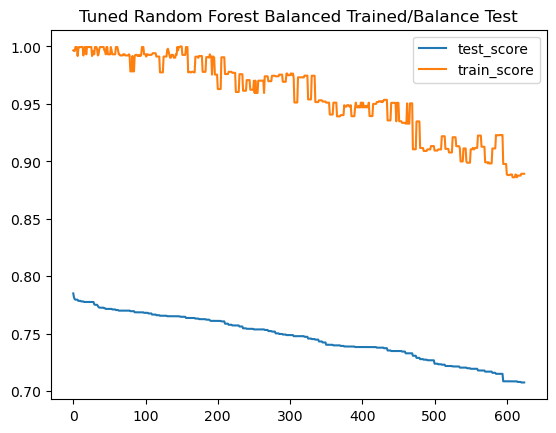

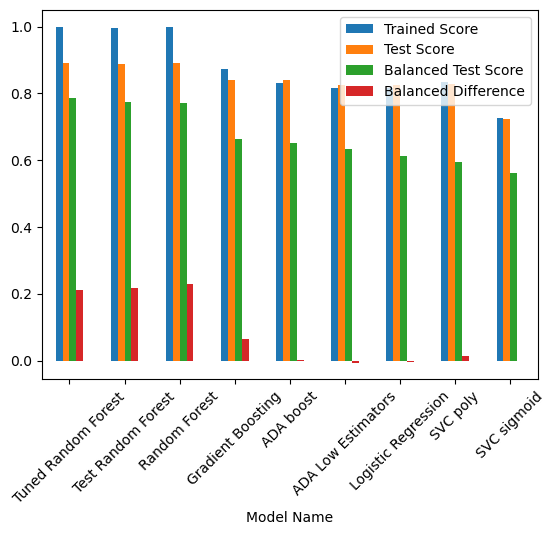

In [25]:
models_max_leaf = tests.many_models_max_leaf(X_train,y_train,X_test,y_test)


Random Forest 
Test Accuracy: 0.8907692307692308
balanced test score: 0.7709999394159699
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1048
           1       0.81      0.58      0.67       252

    accuracy                           0.89      1300
   macro avg       0.86      0.77      0.80      1300
weighted avg       0.89      0.89      0.88      1300


Gradient Boost 
Test Accuracy: 0.8407692307692308
balanced test score: 0.6646371016600023

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1048
           1       0.66      0.38      0.48       252

    accuracy                           0.84      1300
   macro avg       0.76      0.66      0.69      1300
weighted avg       0.82      0.84      0.82      1300


Logistic Regression 
Test Accuracy: 0.8246153846153846
balanced test score: 0.6139282685084212
classification re

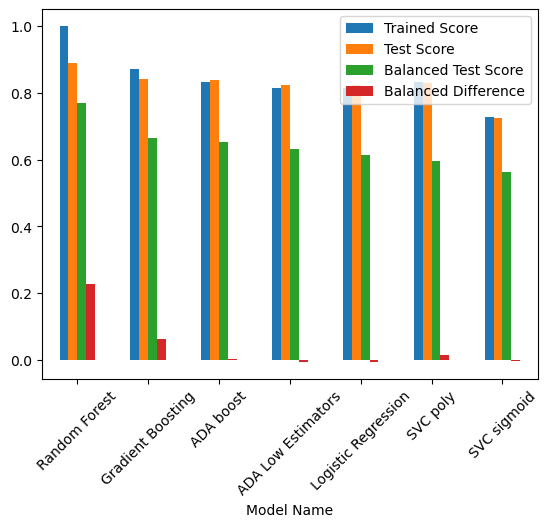

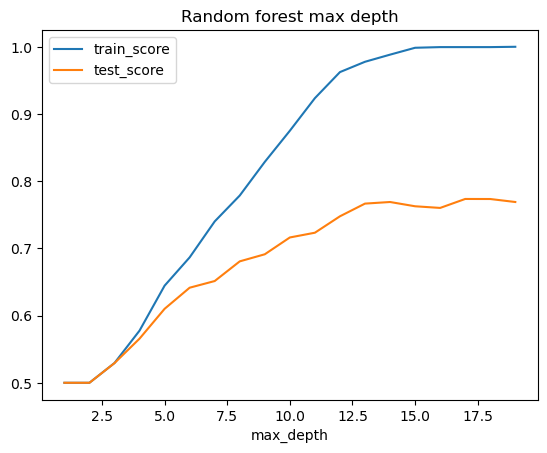

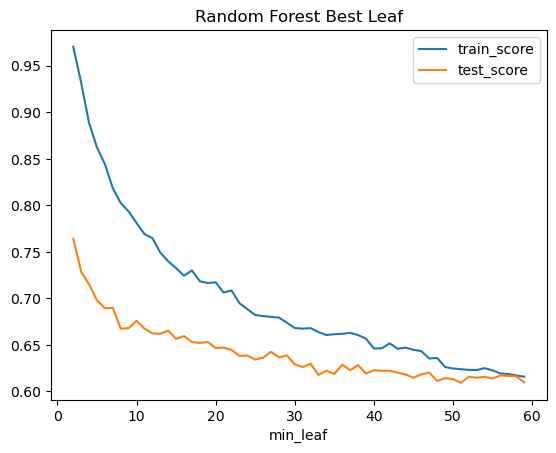

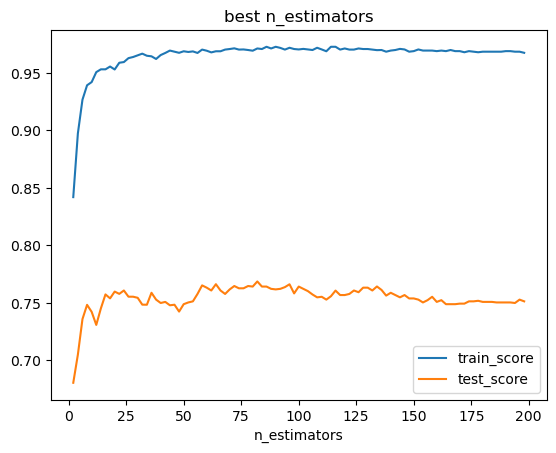

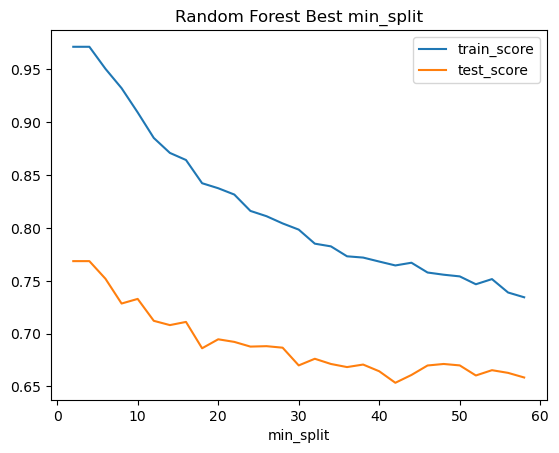

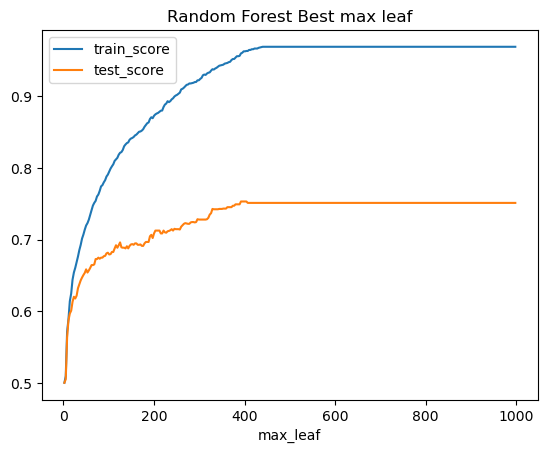

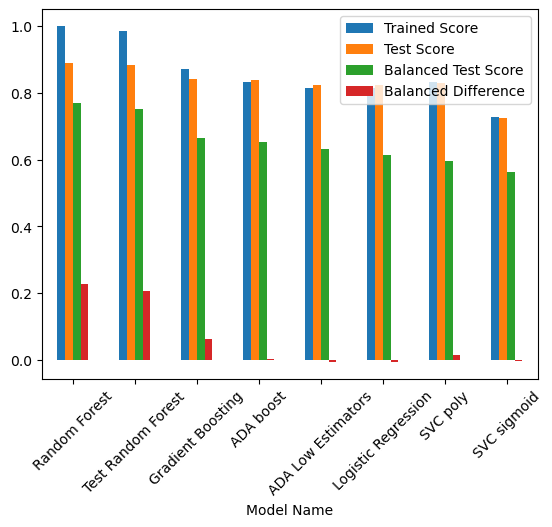

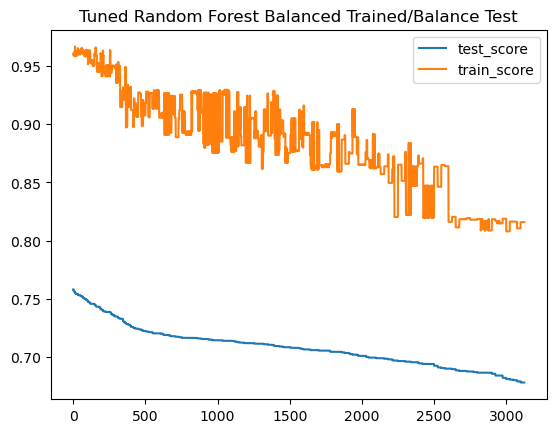

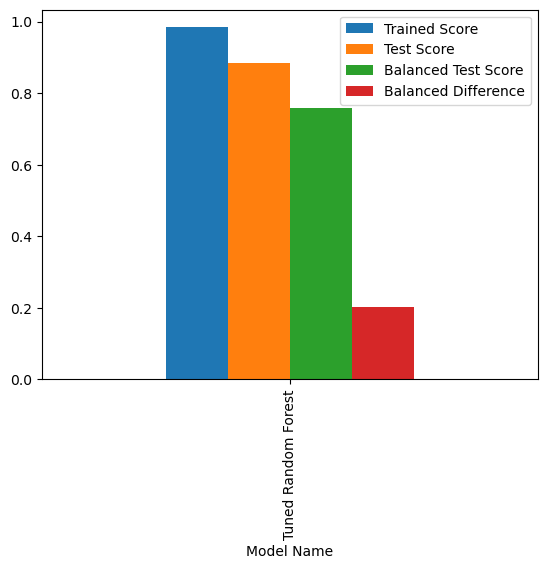

In [26]:
models_full = tests.many_models_full(X_train,y_train,X_test,y_test)


Random Forest 
Test Accuracy: 0.8907692307692308
balanced test score: 0.7709999394159699
classification report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1048
           1       0.81      0.58      0.67       252

    accuracy                           0.89      1300
   macro avg       0.86      0.77      0.80      1300
weighted avg       0.89      0.89      0.88      1300


Gradient Boost 
Test Accuracy: 0.8407692307692308
balanced test score: 0.6646371016600023

 classification report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1048
           1       0.66      0.38      0.48       252

    accuracy                           0.84      1300
   macro avg       0.76      0.66      0.69      1300
weighted avg       0.82      0.84      0.82      1300


Logistic Regression 
Test Accuracy: 0.8246153846153846
balanced test score: 0.6139282685084212
classification re

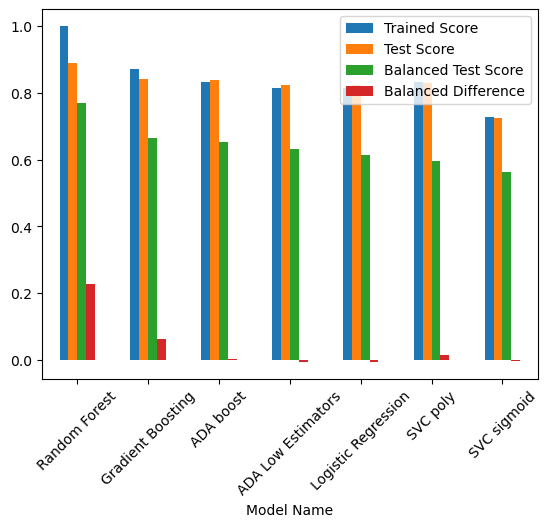

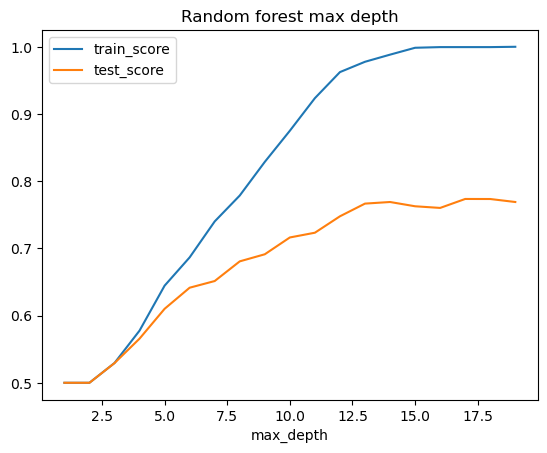

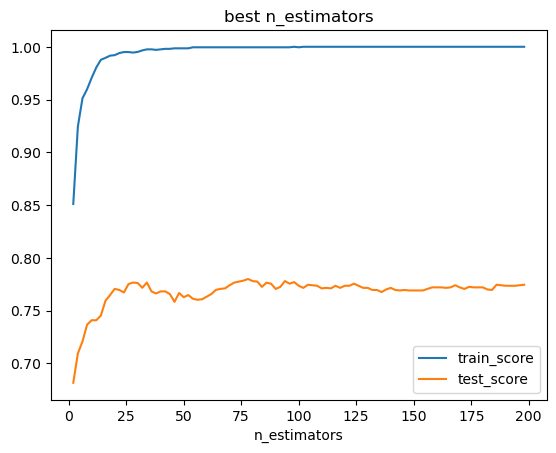

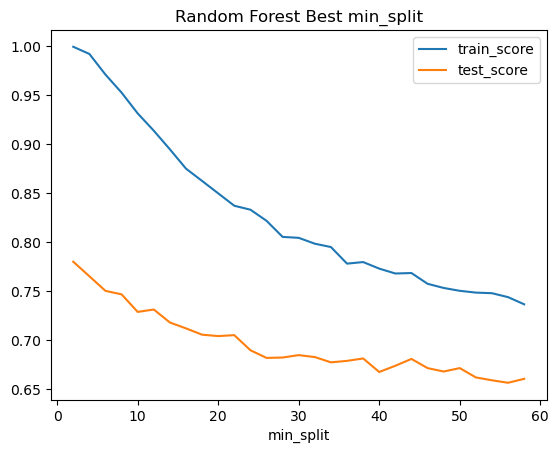

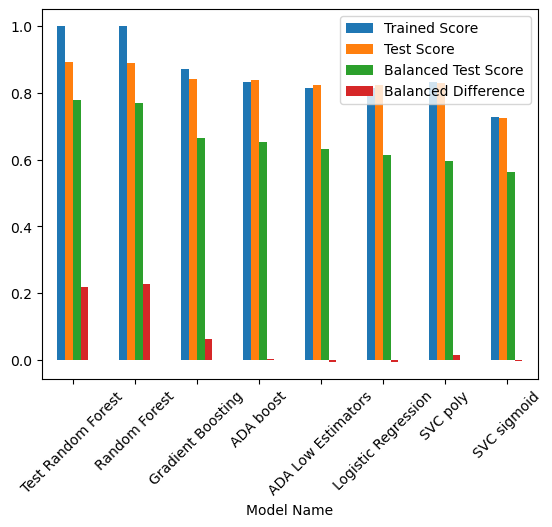

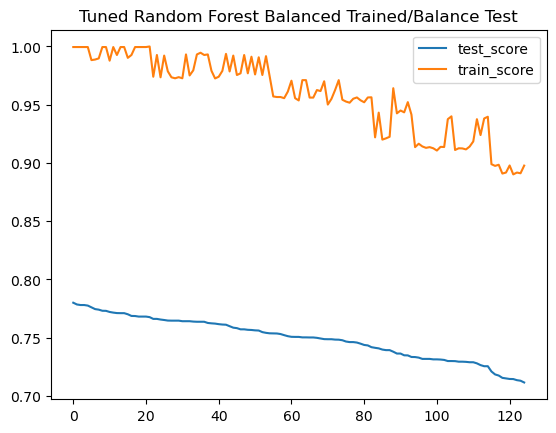

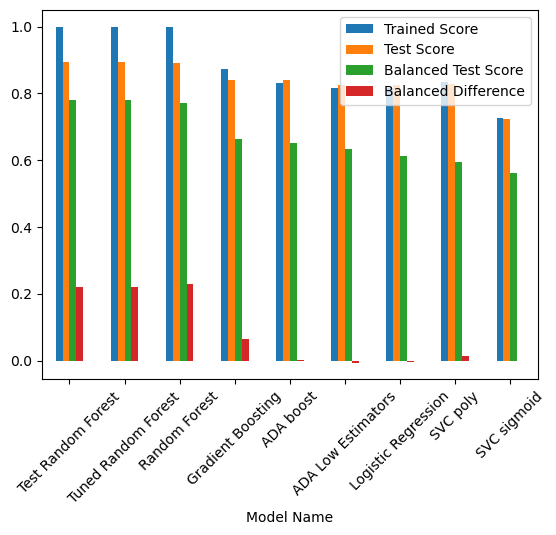

In [27]:
models_no_leaf = tests.many_models_no_leaf(X_train,y_train,X_test,y_test)